<a href="https://colab.research.google.com/github/BooEiEi/Predicting-Technology-Sector-Stock-Prices/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF4'

Mounted at /content/drive


In [ ]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [ ]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])

In [ ]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])

In [ ]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])

In [ ]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])

In [ ]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])

In [ ]:
df_GOOG

,date,Stockprice_GOOGL,sentiment_GOOGL,Interest,UNEMPLOYMENT,CPI,US_Treasury_Yield,RETAIL_SALES,US_inflation_rate,Real_GDP,US_Dollar_Index,S&P500,NASDAQ,WTI,BTC,Gold
0,2025-02-28,170.2800,0.393456,4.33,4.0,317.671,4.24,577230.0,0.030,6001.465,107.61,5954.50,18847.28,69.80,84381.2,2848.5
1,2025-02-27,168.5000,0.458250,4.33,4.0,317.671,4.29,577230.0,0.030,6001.465,107.24,5861.57,18544.42,70.00,84714.6,2895.9
2,2025-02-26,172.7300,0.371140,4.33,4.0,317.671,4.25,577230.0,0.030,6001.465,106.42,5956.06,19075.26,68.70,84212.7,2917.8
3,2025-02-25,175.4200,0.250000,4.33,4.0,317.671,4.30,577230.0,0.030,6001.465,106.31,5955.25,19026.39,69.02,88686.0,2906.0
4,2025-02-24,179.2500,0.366400,4.33,4.0,317.671,4.40,577230.0,0.030,6001.465,106.60,5983.25,19286.93,70.76,91508.5,2949.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-03-07,126.3785,0.396400,0.08,3.7,287.504,1.78,595064.0,0.075,5337.277,99.29,4201.09,12830.96,122.09,38024.8,1995.9
749,2022-03-04,131.9065,-0.128000,0.08,3.7,287.504,1.74,595064.0,0.075,5337.277,98.65,4328.87,13313.44,116.37,39142.7,1966.6
750,2022-03-03,133.8995,0.000000,0.08,3.7,287.504,1.86,595064.0,0.075,5337.277,97.79,4363.49,13537.94,110.52,42463.0,1935.9
751,2022-03-02,134.5715,0.177900,0.08,3.7,287.504,1.86,595064.0,0.075,5337.277,97.39,4386.54,13752.02,112.22,43912.8,1922.3


#Feature Importance

In [ ]:
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

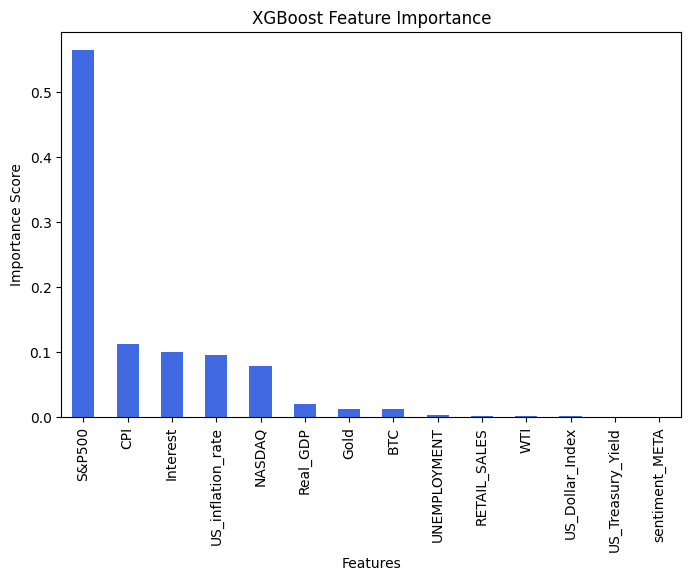

S&P500               0.564331
CPI                  0.112589
Interest             0.100400
US_inflation_rate    0.094970
NASDAQ               0.078297
Real_GDP             0.019387
Gold                 0.012446
BTC                  0.011786
UNEMPLOYMENT         0.002132
RETAIL_SALES         0.001324
WTI                  0.001097
US_Dollar_Index      0.000643
US_Treasury_Yield    0.000483
sentiment_META       0.000114
dtype: float32


In [ ]:
X_META = df_META.drop(columns=["Stockprice_META","date"])
y_META = df_META["Stockprice_META"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_META, y_META)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_META.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


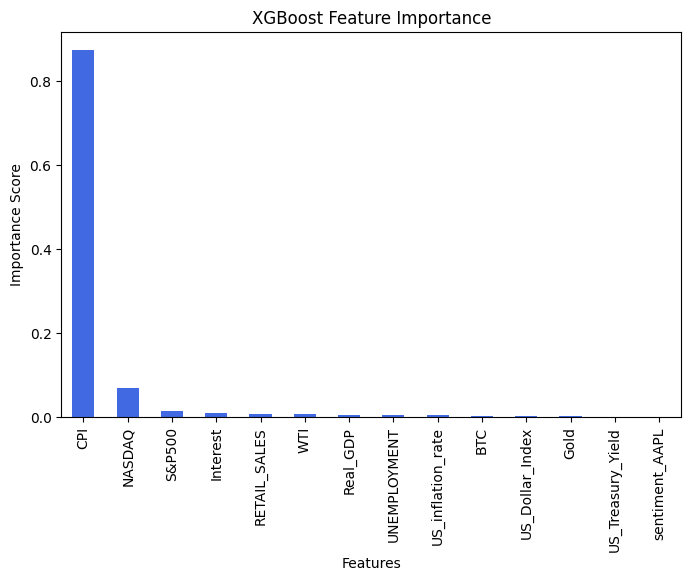

CPI                  0.872920
NASDAQ               0.069518
S&P500               0.014693
Interest             0.008304
RETAIL_SALES         0.007364
WTI                  0.006716
Real_GDP             0.005289
UNEMPLOYMENT         0.004193
US_inflation_rate    0.004093
BTC                  0.003143
US_Dollar_Index      0.001494
Gold                 0.001493
US_Treasury_Yield    0.000671
sentiment_AAPL       0.000109
dtype: float32


In [ ]:
X_AAPL = df_AAPL.drop(columns=["Stockprice_AAPL","date"])
y_AAPL = df_AAPL["Stockprice_AAPL"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_AAPL, y_AAPL)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_AAPL.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


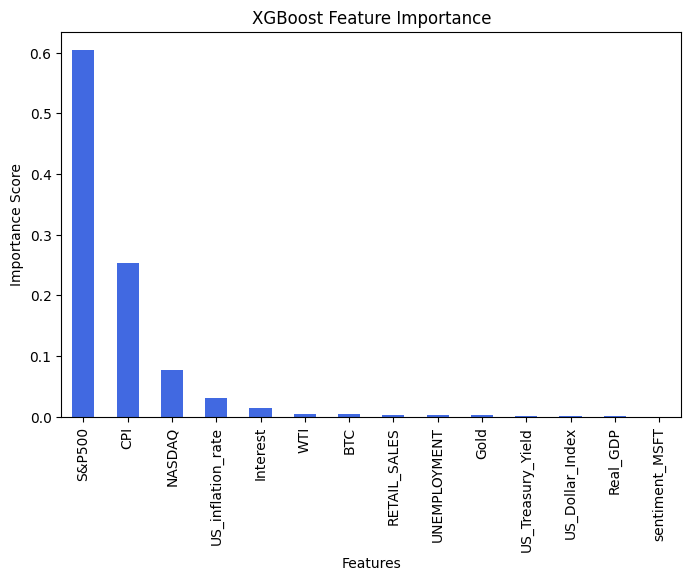

S&P500               0.604059
CPI                  0.253217
NASDAQ               0.077249
US_inflation_rate    0.030673
Interest             0.015264
WTI                  0.004996
BTC                  0.003994
RETAIL_SALES         0.003130
UNEMPLOYMENT         0.002508
Gold                 0.002474
US_Treasury_Yield    0.000947
US_Dollar_Index      0.000697
Real_GDP             0.000645
sentiment_MSFT       0.000147
dtype: float32


In [ ]:
X_MSFT = df_MSFT.drop(columns=["Stockprice_MSFT","date"])
y_MSFT = df_MSFT["Stockprice_MSFT"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_MSFT, y_MSFT)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_MSFT.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


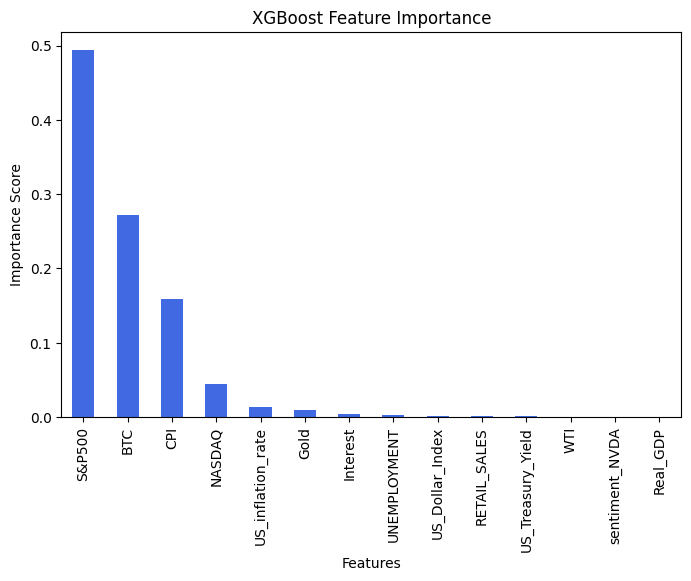

S&P500               0.493702
BTC                  0.271497
CPI                  0.159277
NASDAQ               0.044816
US_inflation_rate    0.013536
Gold                 0.008605
Interest             0.003485
UNEMPLOYMENT         0.002214
US_Dollar_Index      0.000879
RETAIL_SALES         0.000686
US_Treasury_Yield    0.000572
WTI                  0.000451
sentiment_NVDA       0.000281
Real_GDP             0.000000
dtype: float32


In [ ]:
X_NVDA = df_NVDA.drop(columns=["Stockprice_NVDA","date"])
y_NVDA = df_NVDA["Stockprice_NVDA"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_NVDA, y_NVDA)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_NVDA.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


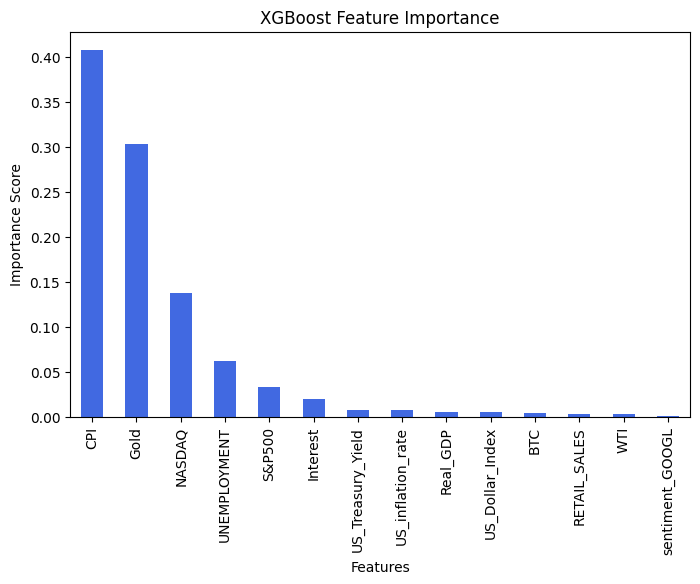

CPI                  0.407925
Gold                 0.303184
NASDAQ               0.137970
UNEMPLOYMENT         0.062084
S&P500               0.033262
Interest             0.019692
US_Treasury_Yield    0.007736
US_inflation_rate    0.007125
Real_GDP             0.005176
US_Dollar_Index      0.004952
BTC                  0.003978
RETAIL_SALES         0.003424
WTI                  0.003232
sentiment_GOOGL      0.000259
dtype: float32


In [ ]:
X_GOOG = df_GOOG.drop(columns=["Stockprice_GOOGL","date"])
y_GOOG = df_GOOG["Stockprice_GOOGL"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_GOOG, y_GOOG)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_GOOG.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


#Correlation

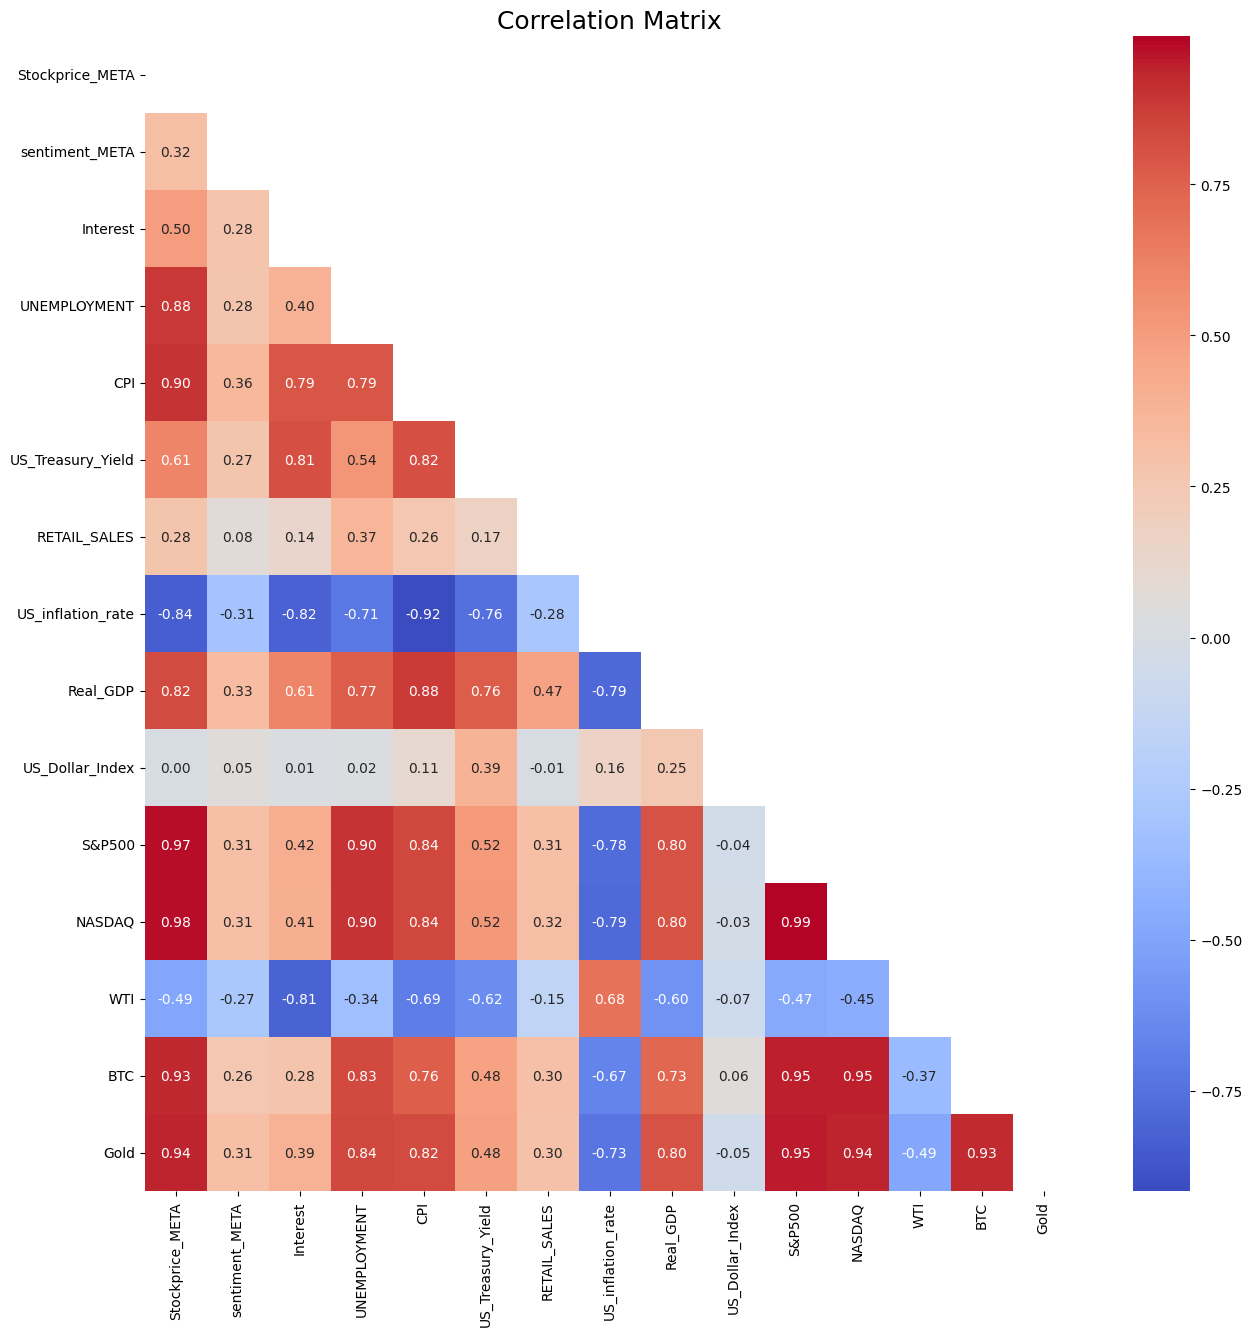

In [ ]:
mask_META = np.triu(np.ones_like(df_META.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_META.drop(columns=["date"]).corr(), annot=True, mask=mask_META, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

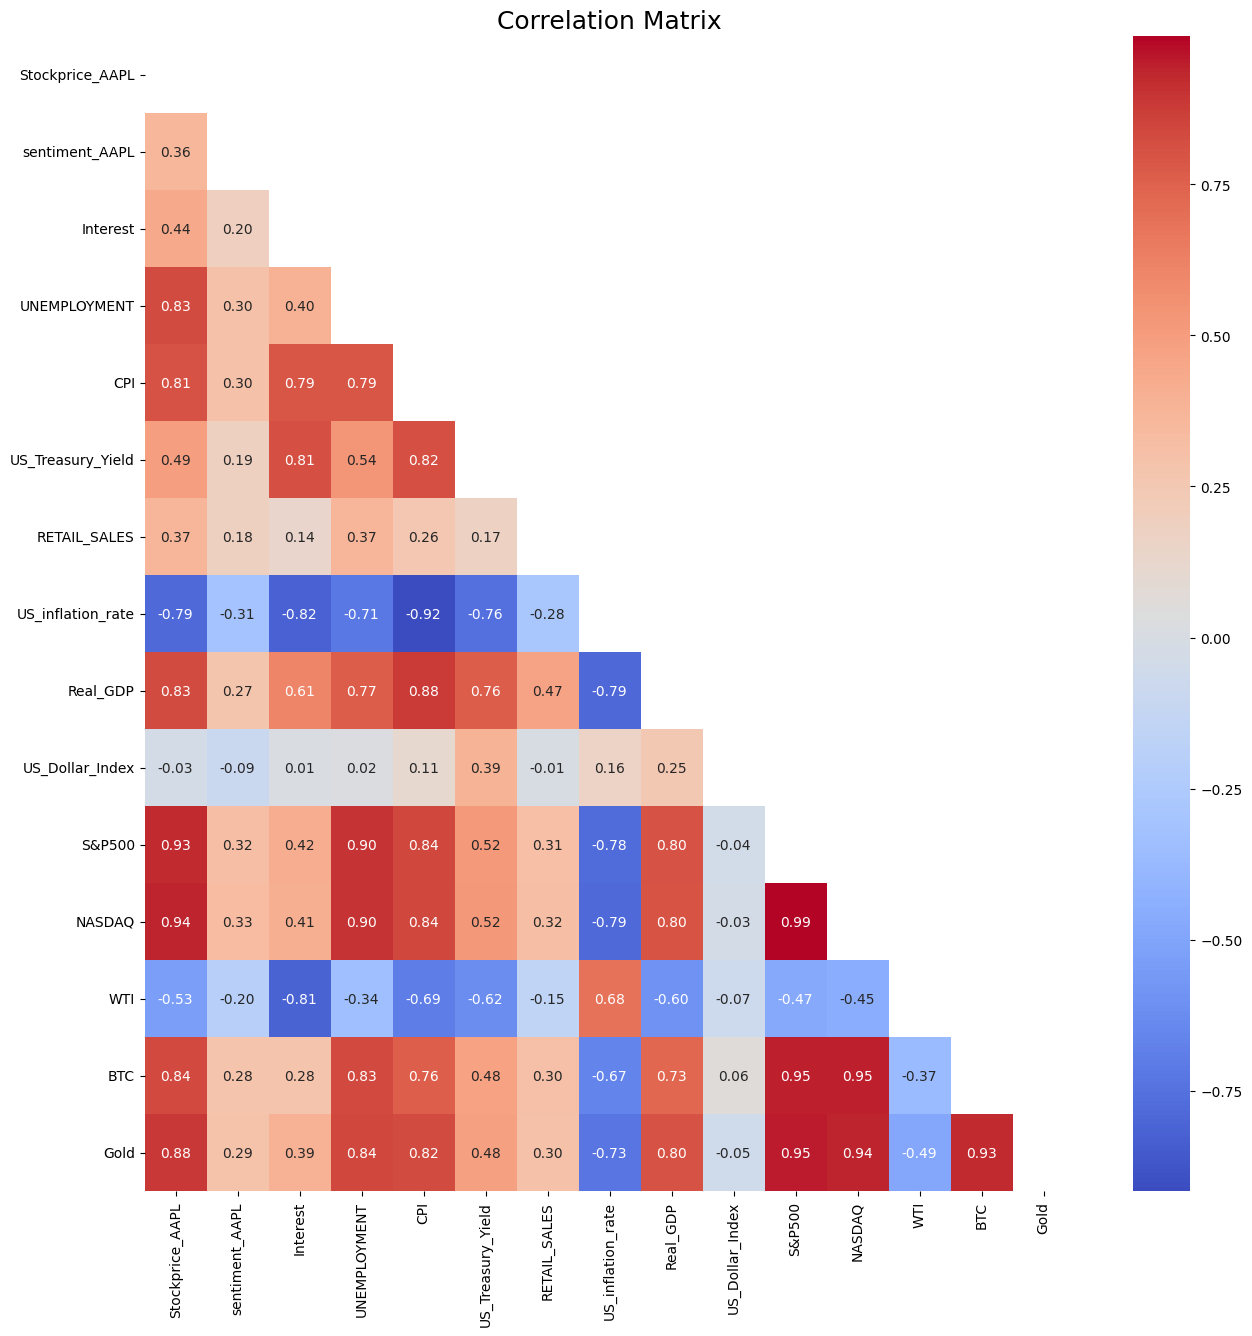

In [ ]:
mask_AAPL = np.triu(np.ones_like(df_AAPL.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_AAPL.drop(columns=["date"]).corr(), annot=True, mask=mask_AAPL, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

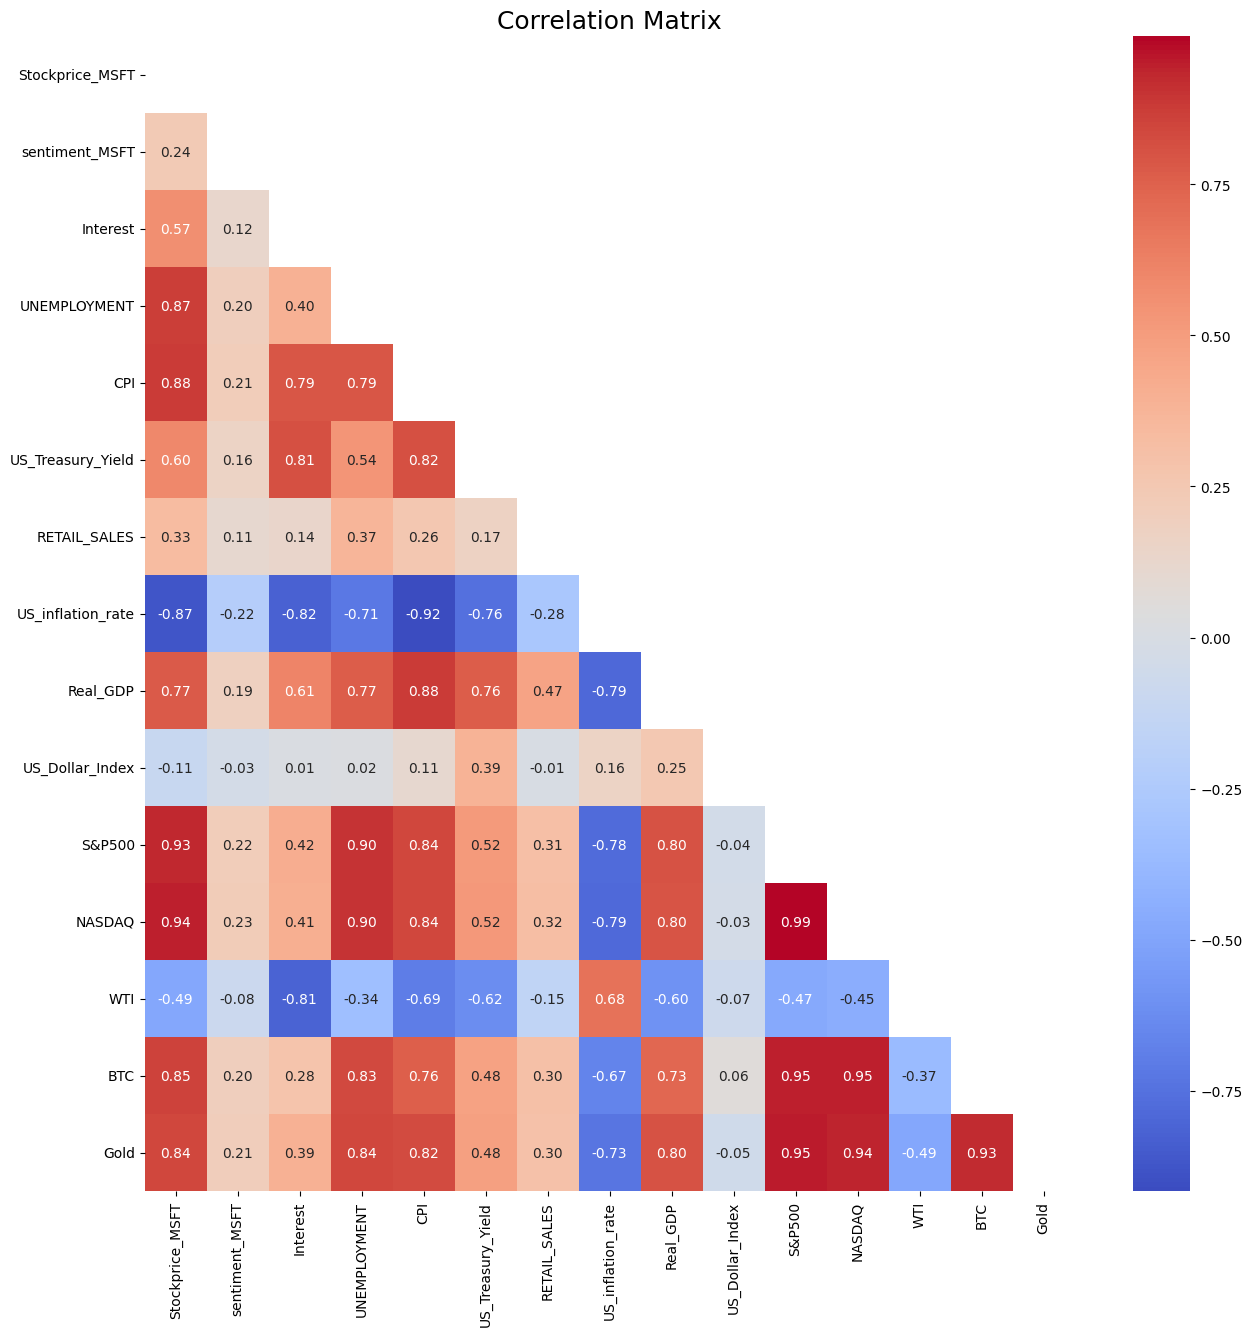

In [ ]:
mask_MSFT = np.triu(np.ones_like(df_MSFT.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_MSFT.drop(columns=["date"]).corr(), annot=True, mask=mask_MSFT, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

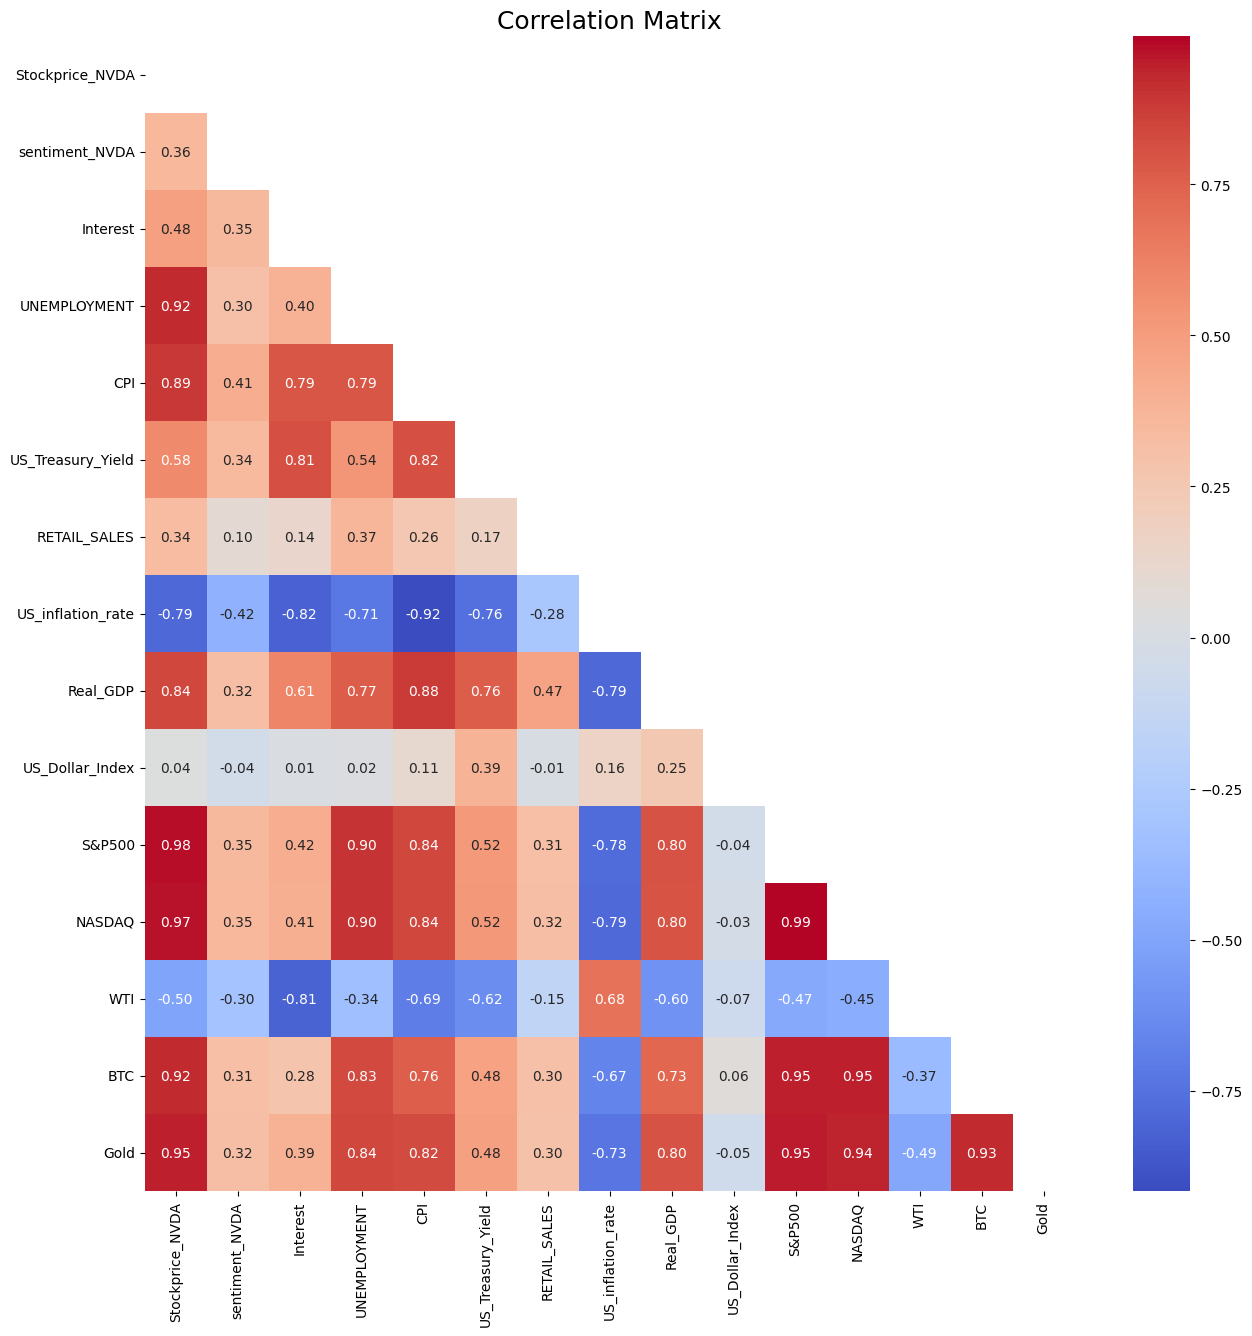

In [ ]:
mask_NVDA = np.triu(np.ones_like(df_NVDA.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_NVDA.drop(columns=["date"]).corr(), annot=True, mask=mask_NVDA, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

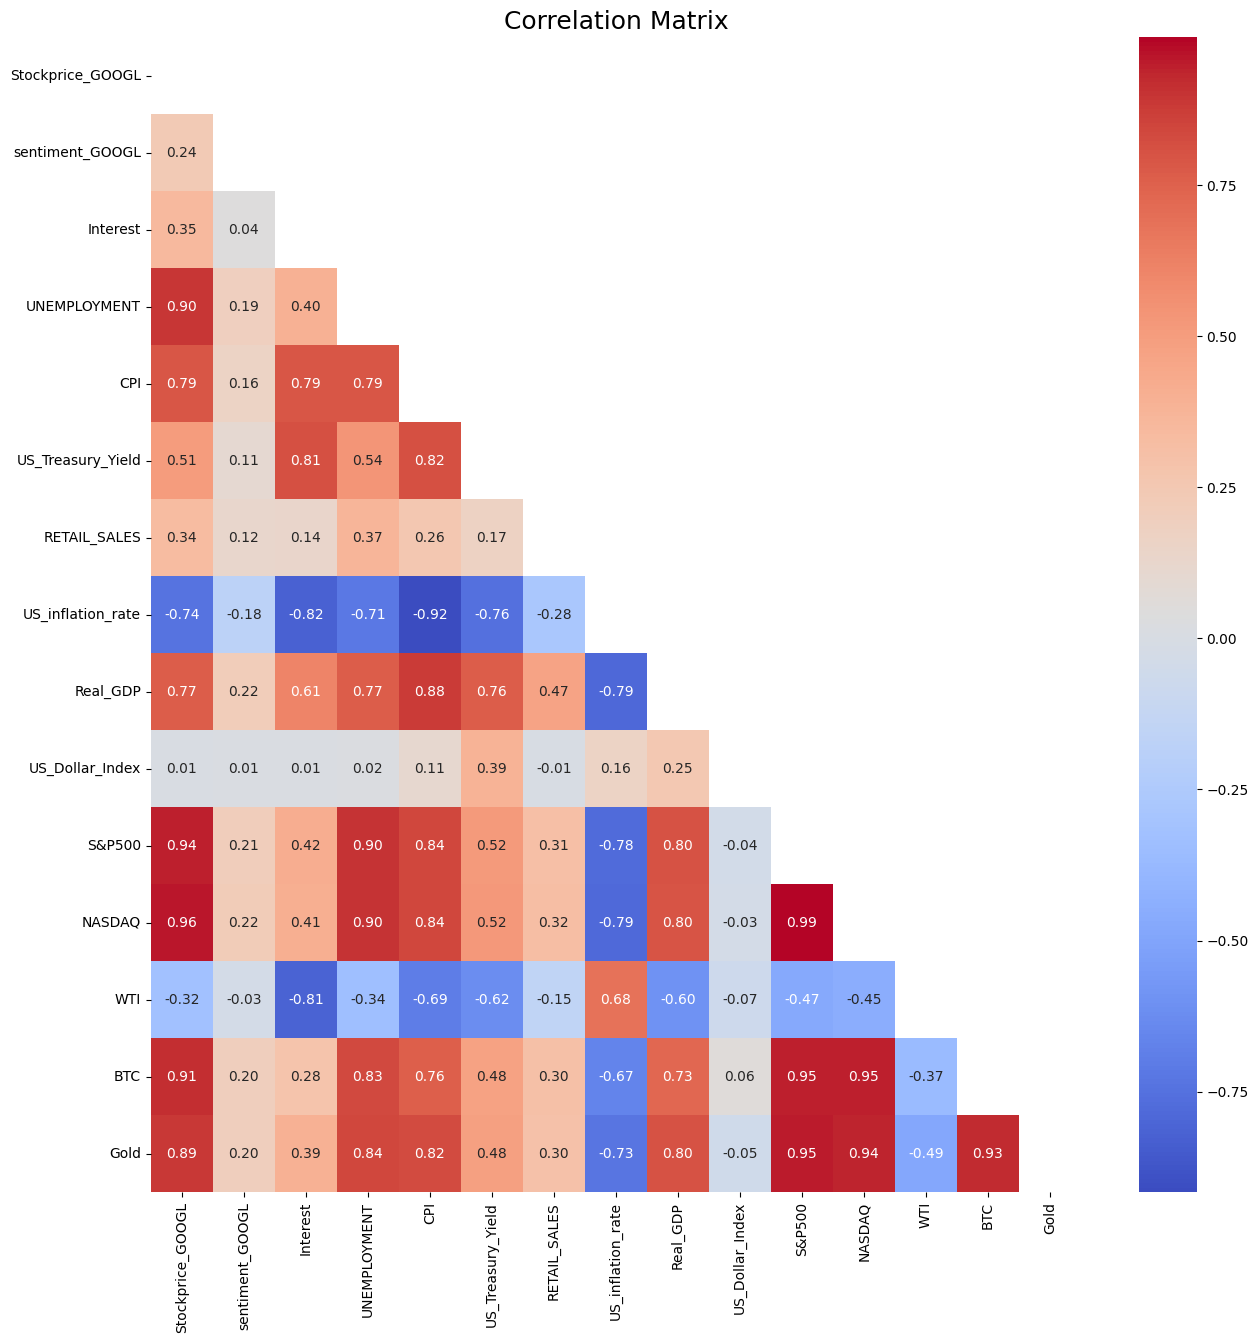

In [ ]:
mask_GOOG = np.triu(np.ones_like(df_GOOG.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_GOOG.drop(columns=["date"]).corr(), annot=True, mask=mask_GOOG, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()